# Download Dataset from kaggle

In [ ]:
! pip install -q kaggle
! echo '{"username":"raphaelziegler","key":"6411cf4677214e4b50e909e3087b3c9a"}' > kaggle.json
# ! cat kaggle.json
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d biancaferreira/african-wildlife
! unzip -qq african-wildlife.zip

 98% 437M/448M [00:04<00:00, 123MB/s]
100% 448M/448M [00:04<00:00, 105MB/s]


# Python Imports

In [1]:
import os
import sys
import shutil
import tarfile
import datetime
import json

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

from scipy.ndimage import rotate

Import helper functions 

# Variables (what should be executed)
- Image size

In [2]:
# set image size
width = 224
height = 224

# Runs per epoch
run = 1

# numbers of epoches
n_epochs = [27] # [1, 3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27]

# batch size
batch_size = 32

# learning rate
learning_rate = 0.0005

# model name for filenames
model_name = "ResNet50"

# Read Images

In [ ]:
read_images = False

if read_images == True:
    !wget --no-cache "https://raw.githubusercontent.com/raphaelziegler/CAS-in-Applied-Data-Science/main/M6/helper.py"
    !wget --no-cache "https://raw.githubusercontent.com/raphaelziegler/CAS-in-Applied-Data-Science/main/M6/image_manipulation.py"

    import helper as h
    import image_manipulation as im


    # read path of images
    rp, bp, ep, zp = h.get_image_path()


    images = []
    labels = []


    for path in rp:
        meta = im.read_metadata_file(path)
        c_img = im.image_stuff(path, meta, width, height)
        for i in c_img:
            images.append(np.array(i, dtype=np.uint8))
            labels.append([0, 0, 0, 1])

    for path in bp:
        meta = im.read_metadata_file(path)
        c_img = im.image_stuff(path, meta, width, height)
        for i in c_img:
            images.append(np.array(i, dtype=np.uint8))
            labels.append([1, 0, 0, 0])
        
    for path in ep:
        meta = im.read_metadata_file(path)
        c_img = im.image_stuff(path, meta, width, height)
        for i in c_img:
            images.append(np.array(i, dtype=np.uint8))
            labels.append([0, 1, 0, 0])
        
    for path in zp:
        meta = im.read_metadata_file(path)
        c_img = im.image_stuff(path, meta, width, height)
        for i in c_img:
            images.append(np.array(i, dtype=np.uint8))
            labels.append([0, 0, 1, 0])

    # images = images.append(np.array(tf.keras.applications.nasnet.preprocess_input(images)))

In [ ]:
def prepare_training_img(img, crop=True, resize=True, img_size=(width, height)):
    if img.dtype != np.uint8:
        img *= 255.0

    if crop:
        crop = np.min(img.shape[:2])
        r = (img.shape[0] - crop) // 2
        c = (img.shape[1] - crop) // 2
        cropped = img[r: r + crop, c: c + crop]
    else:
        cropped = img

    if resize:
        img_pil = Image.fromarray(cropped)
        img_pil = img_pil.resize(img_size, Image.ANTIALIAS)
        resized = np.array(img_pil.convert('RGB'))
    else:
        resized = cropped.copy()

    if resized.ndim == 2:
        resized = resized[..., np.newaxis]
    if resized.shape[2] == 4:
        resized = resized[..., :3]
    if resized.shape[2] == 1:
        resized = np.concatenate((resized, resized, resized), axis=2)

    resized = resized.astype(np.float32)

    # img_preproc = tf.keras.applications.nasnet.preprocess_input(resized)
    # img_preproc = tf.keras.applications.densenet.preprocess_input(resized)
    img_preproc = tf.keras.applications.inception_v3.preprocess_input(resized)
    
    # subtract imagenet mean
    return img_preproc

def training_img_to_display(img):
    return (img+1)/2


labels = []
images = []


for sample in range(1,285):
    if os.path.isfile('buffalo/'+str(sample).zfill(3)+'.jpg'):
        Namef='buffalo/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='buffalo/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([1,0,0,0])

for sample in range(287,377):
    if os.path.isfile('buffalo/'+str(sample).zfill(3)+'.jpg'):
        Namef='buffalo/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='buffalo/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([1,0,0,0])

for sample in range(1,321):
    if os.path.isfile('elephant/'+str(sample).zfill(3)+'.jpg'):
        Namef='elephant/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='elephant/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([0,1,0,0])

for sample in range(323,377):
    if os.path.isfile('elephant/'+str(sample).zfill(3)+'.jpg'):
        Namef='elephant/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='elephant/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([0,1,0,0])

for sample in range(1,54):
    if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
        Namef='zebra/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='zebra/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([0,0,1,0])

for sample in range(56,136):
    if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
        Namef='zebra/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='zebra/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([0,0,1,0])

for sample in range(138,232):
    if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
        Namef='zebra/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='zebra/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([0,0,1,0])

for sample in range(234,297):
    if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
        Namef='zebra/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='zebra/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([0,0,1,0])

for sample in range(299,380):
    if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
        Namef='zebra/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='zebra/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([0,0,1,0])

for sample in range(1,69):
    if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
        Namef='rhino/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='rhino/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([0,0,0,1])

for sample in range(71,106):
    if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
        Namef='rhino/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='rhino/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([0,0,0,1])

for sample in range(108,113):
    if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
        Namef='rhino/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='rhino/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([0,0,0,1])

for sample in range(115,146):
    if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
        Namef='rhino/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='rhino/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([0,0,0,1])

for sample in range(148,380):
    if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
        Namef='rhino/'+str(sample).zfill(3)+'.jpg'
    else:
        Namef='rhino/'+str(sample).zfill(3)+'.JPG'
    img = plt.imread(Namef)
    images.append(prepare_training_img(img))
    labels.append([0,0,0,1])

In [ ]:
labels = np.array(labels)
images = np.array(images)

In [ ]:
np.random.seed(42)
idx = np.random.permutation(len(labels))
labels = np.array(labels)[idx]
images = np.array(images)[idx]

In [ ]:
#We will take 80% from each for training and 20% for validation
n_half = images.shape[0]
n_train_half = n_half*80//100

x_train = images[:n_train_half]
y_train = labels[:n_train_half]

x_valid = images[n_train_half:]
y_valid = labels[n_train_half:]

# ResNet50

## Transfer Learning

In [3]:
base_model = tf.keras.applications.ResNet50(include_top=False)

94765736/94765736 [==============================] - 5s 0us/step


In [4]:
result = {}

plot = False


for n_epoch in n_epochs:
    t = []
    a = []
    e = {}
    for r in range(0, run):

        x = tf.keras.layers.Input(shape=(width,height,3), dtype=tf.float32)

        base_model.trainable = False
        base_out = base_model(x)

        base_out_f = tf.keras.layers.GlobalAveragePooling2D()(base_out)

        h1 = tf.keras.layers.Dense(64, activation='sigmoid')(base_out_f)
        h2 = tf.keras.layers.Dense(4, activation='softmax')(h1)

        model = tf.keras.Model(x, h2)

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate,) ,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
        model.summary()
"""
        print(f"\n\nNumber of epochs: {n_epoch}, Run {r}")
        start_time = datetime.datetime.now()
        hist = model.fit(x_train, y_train,
                        epochs=n_epoch, batch_size=batch_size, 
                        validation_data=(x_valid, y_valid))
        end_time = datetime.datetime.now()
        # result[n_epoch] = {"time": end_time - start_time, "accuracy": model.get_metrics_result()["accuracy"]}
        t = ((end_time - start_time).total_seconds())
        a = (model.get_metrics_result()["accuracy"]*100.)
        print(t)
        print(a)
        
        if plot:
            fig, axs = plt.subplots(1, 2, figsize=(10,5))
            axs[0].plot(hist.epoch, hist.history['loss'])
            axs[0].plot(hist.epoch, hist.history['val_loss'])
            axs[0].legend(('training loss', 'validation loss'), loc='upper right')
            axs[1].plot(hist.epoch, hist.history['accuracy'])
            axs[1].plot(hist.epoch, hist.history['val_accuracy'])

            axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
            plt.show()
        e[f"{r}"] = {"time": t, "accuracy": a}
        print(e)
    result[f"{n_epoch}"] = e
"""

# print(result)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 23,719,108
Trainable params: 131,396
Non-trainable params: 23,587,712
___________________________________________

'\n        print(f"\n\nNumber of epochs: {n_epoch}, Run {r}")\n        start_time = datetime.datetime.now()\n        hist = model.fit(x_train, y_train,\n                        epochs=n_epoch, batch_size=batch_size, \n                        validation_data=(x_valid, y_valid))\n        end_time = datetime.datetime.now()\n        # result[n_epoch] = {"time": end_time - start_time, "accuracy": model.get_metrics_result()["accuracy"]}\n        t = ((end_time - start_time).total_seconds())\n        a = (model.get_metrics_result()["accuracy"]*100.)\n        print(t)\n        print(a)\n        \n        if plot:\n            fig, axs = plt.subplots(1, 2, figsize=(10,5))\n            axs[0].plot(hist.epoch, hist.history[\'loss\'])\n            axs[0].plot(hist.epoch, hist.history[\'val_loss\'])\n            axs[0].legend((\'training loss\', \'validation loss\'), loc=\'upper right\')\n            axs[1].plot(hist.epoch, hist.history[\'accuracy\'])\n            axs[1].plot(hist.epoch, hist.histo

In [ ]:
x = []
y_time = []
y_acc = []

for key, values in result.items():
    print(f"Epoch: {key}")
    x.append(int(key))
    t = []
    a = []
    for k, v in values.items():
        print(f"Run: {k}")
        print("time: ", v["time"])
        print("accuracy: ", v["accuracy"])
        t.append(v["time"])
        a.append(v["accuracy"])
    y_time.append(np.mean(t))
    y_acc.append(np.mean(a))
    # y_time.append((t))
    # y_acc.append((a))

#print("---------------------------------------------------------------------")
#print(f"x: {x}")
#print(f"y time: {y_time}")
#print(f"y accuracy: {y_acc}")


Epoch: 1
Run: 0
time:  26.408321
accuracy:  tf.Tensor(35.90604, shape=(), dtype=float32)
Run: 1
time:  15.473093
accuracy:  tf.Tensor(44.630875, shape=(), dtype=float32)
Run: 2
time:  16.799035
accuracy:  tf.Tensor(42.61745, shape=(), dtype=float32)
Epoch: 3
Run: 0
time:  26.249373
accuracy:  tf.Tensor(44.630875, shape=(), dtype=float32)
Run: 1
time:  26.578008
accuracy:  tf.Tensor(50.335567, shape=(), dtype=float32)
Run: 2
time:  24.569341
accuracy:  tf.Tensor(54.026848, shape=(), dtype=float32)
Epoch: 5
Run: 0
time:  46.767203
accuracy:  tf.Tensor(53.691273, shape=(), dtype=float32)
Run: 1
time:  46.236355
accuracy:  tf.Tensor(56.71141, shape=(), dtype=float32)
Run: 2
time:  46.096603
accuracy:  tf.Tensor(55.033558, shape=(), dtype=float32)
Epoch: 7
Run: 0
time:  46.310384
accuracy:  tf.Tensor(57.046978, shape=(), dtype=float32)
Run: 1
time:  46.262409
accuracy:  tf.Tensor(60.067112, shape=(), dtype=float32)
Run: 2
time:  44.150545
accuracy:  tf.Tensor(55.369125, shape=(), dtype=floa

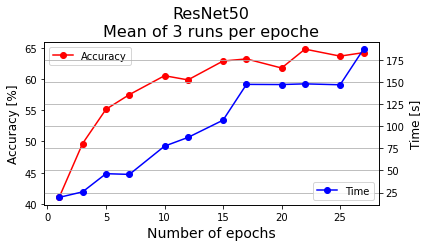

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(6, 3))
# make a plot
l1 = ax.plot(x, y_acc, color="red", marker="o", label="Accuracy")
# set x-axis label
ax.set_xlabel("Number of epochs", fontsize = 14)
# set y-axis label
ax.set_ylabel("Accuracy [%]", color="black", fontsize=12)
plt.legend(loc='upper left')

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l2 = ax2.plot(x, y_time, color="blue", marker="o", label="Time")
ax2.set_ylabel("Time [s]", color="black", fontsize=12)
plt.title(f"{model_name}\nMean of {run} runs per epoche", fontsize=16)
plt.grid()
plt.legend(loc='lower right')
plt.show()

# save the plot as a file
fig.savefig(f"{model_name}_runs_{run}_{learning_rate}_{batch_size}.jpg", format='jpeg', dpi=100, bbox_inches='tight')

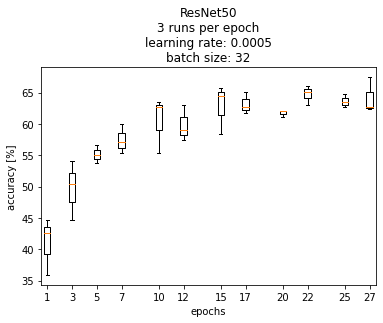

In [ ]:
# boxplot accuracy

xaxis = []
a = []

for epoch, values in result.items():
    xaxis.append(int(epoch))

    for r, value in values.items():
        foo = str(value["accuracy"]).split("=")[0][10:16]
        a.append(float(foo))

chunks = [a[x:x + 3] for x in range(0, len(a), 3)]

# Creating plot
plt.boxplot(chunks, positions=xaxis)

# decorating
plt.title(f"{model_name}\n{run} runs per epoch\nlearning rate: {learning_rate}\nbatch size: {batch_size}")
plt.ylabel("accuracy [%]")
plt.xlabel("epochs")

# save plot
plt.savefig(f"{model_name}_accuracy_{run} runs per epoch_learning rate_{learning_rate}_batch size_{batch_size}.jpg", format='jpeg', dpi=300, bbox_inches='tight')

# show plot
plt.show()

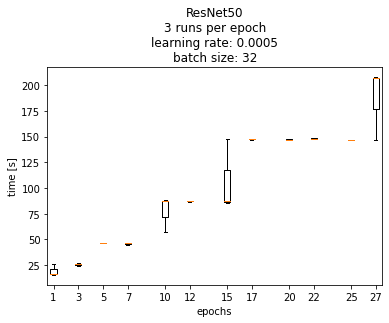

In [ ]:
# boxplot time

xaxis = []
a = []

for epoch, values in result.items():
    xaxis.append(int(epoch))

    for r, value in values.items():
        foo = str(value["time"])
        a.append(float(foo))

chunks = [a[x:x + 3] for x in range(0, len(a), 3)]

# Creating plot
plt.boxplot(chunks, positions=xaxis)

# decorating
plt.title(f"{model_name}\n{run} runs per epoch\nlearning rate: {learning_rate}\nbatch size: {batch_size}")
plt.ylabel("time [s]")
plt.xlabel("epochs")

# save plot
plt.savefig(f"{model_name}_time_{run} runs per epoch_learning rate_{learning_rate}_batch size_{batch_size}.jpg", format='jpeg', dpi=300, bbox_inches='tight')

# show plot
plt.show()

In [ ]:
# save resulting dictionary as .json file
with open(f"{model_name}_runs_{run}_{learning_rate}_{batch_size}.json", "w") as outfile:
        json.dump(str(result), outfile)

1/1 [==============================] - 2s 2s/step
[[1.0486769e-02 3.0193869e-03 9.8616022e-01 3.3366695e-04]]
Zebra


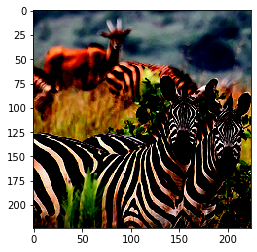

In [ ]:
n = 45
what = model.predict(images[n:n+1])
print(what)
what1 = list(what[0]).index(max(list(what[0])))
# b, e, z , r
if what1 == 0:
    print("Buffalo")
elif what1 == 1:
    print("Elephane")
elif what1 == 2:
    print("Zebra")
elif what1 == 3:
    print("Rhino")


plt.imshow(images[n], interpolation='nearest')
plt.show()


In [ ]:
# what = model.predict(images[n:n+1])
# print(what)
# what1 = list(what[0]).index(max(list(what[0])))

In [ ]:

test_pred = model.predict(x_valid)
pred_class_idx = np.argmax(test_pred, axis=1)

y_valid_mod = []
for y in y_valid:
    y_valid_mod.append(list(y).index(1))

correct = pred_class_idx == y_valid_mod


wrong_idx  = [i for i, c in enumerate(correct) if c == False]


print(f"\nNumber of wrong predictions: {len(wrong_idx)}")

10/10 [==============================] - 1s 93ms/step

Number of wrong predictions: 97


In [ ]:
def translate(n):
    if n == 0:
        return "Buffalo"
    elif n == 1:
        return "Elephant"
    elif n == 2:
        return "Zebra"
    elif n == 3:
        return "Rhino"
    elif n == 4:
        return "Hawler"
    elif n == 5:
        return "Uikari"
    elif n == 6:
        return "Night"

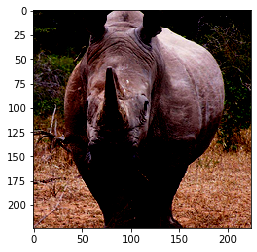

class: Rhino, predicted class:Elephant
>>> probabilities...
    -Buffalo: 34.06%
    -Elephant: 34.86%
    -Zebra: 0.44%
    -Rhino: 30.63%


In [ ]:
wrong_sample_idx = 1
sample_idx = wrong_idx[wrong_sample_idx]

# plt.imshow(x_valid[sample_idx], cmap='gray', interpolation='nearest')
plt.imshow(x_valid[sample_idx]/np.amax(x_valid[sample_idx]), interpolation='nearest')

plt.show()

print(f'class: {translate(y_valid_mod[sample_idx])}, predicted class:{translate(pred_class_idx[sample_idx])}')
print(">>> probabilities...")
for i, p in enumerate(test_pred[sample_idx]): 
    print(f"    -{translate(i)}: {p*100:0.2f}%")

In [ ]:
# show wrong predictions

for i in range(0, len(wrong_idx)):
    wrong_sample_idx = i
    sample_idx = wrong_idx[wrong_sample_idx]

    plt.imshow(x_valid[sample_idx]/np.amax(x_valid[sample_idx]), interpolation='nearest')
    plt.show()

    print(f'class: {translate(y_valid_mod[sample_idx])}, predicted class:{translate(pred_class_idx[sample_idx])}')
    print(">>> probabilities...")
    for i, p in enumerate(test_pred[sample_idx]): 
        print(f"    -{translate(i)}: {p*100:0.2f}%")
    print(f"-----------------------------------\n\n")

Output hidden; open in https://colab.research.google.com to view.